# MLT Assignment
### Based on spotify's songs

In [4]:
# Import the data
import pandas as pd
df = pd.read_csv('dataset.csv', index_col=0)
df.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [5]:
print(df.shape)
df.info()
# We see a wide range of data types

(114000, 20)
<class 'pandas.core.frame.DataFrame'>
Index: 114000 entries, 0 to 113999
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          114000 non-null  object 
 1   artists           113999 non-null  object 
 2   album_name        113999 non-null  object 
 3   track_name        113999 non-null  object 
 4   popularity        114000 non-null  int64  
 5   duration_ms       114000 non-null  int64  
 6   explicit          114000 non-null  bool   
 7   danceability      114000 non-null  float64
 8   energy            114000 non-null  float64
 9   key               114000 non-null  int64  
 10  loudness          114000 non-null  float64
 11  mode              114000 non-null  int64  
 12  speechiness       114000 non-null  float64
 13  acousticness      114000 non-null  float64
 14  instrumentalness  114000 non-null  float64
 15  liveness          114000 non-null  float64
 16  valence     

In [6]:
# Check for nulls and missing values
df.isnull().sum()

track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [7]:
df[df.isnull().any(axis=1)]
# This isn't a lot of meaningful null values to really show different techniques, let's introduce more nulls

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
65900,1kR4gIb7nGxHPI3D2ifs59,NaN,NaN,NaN,0,0,False,0.501,0.583,7,-9.46,0,0.0605,0.69,0.00396,0.0747,0.734,138.391,4,k-pop


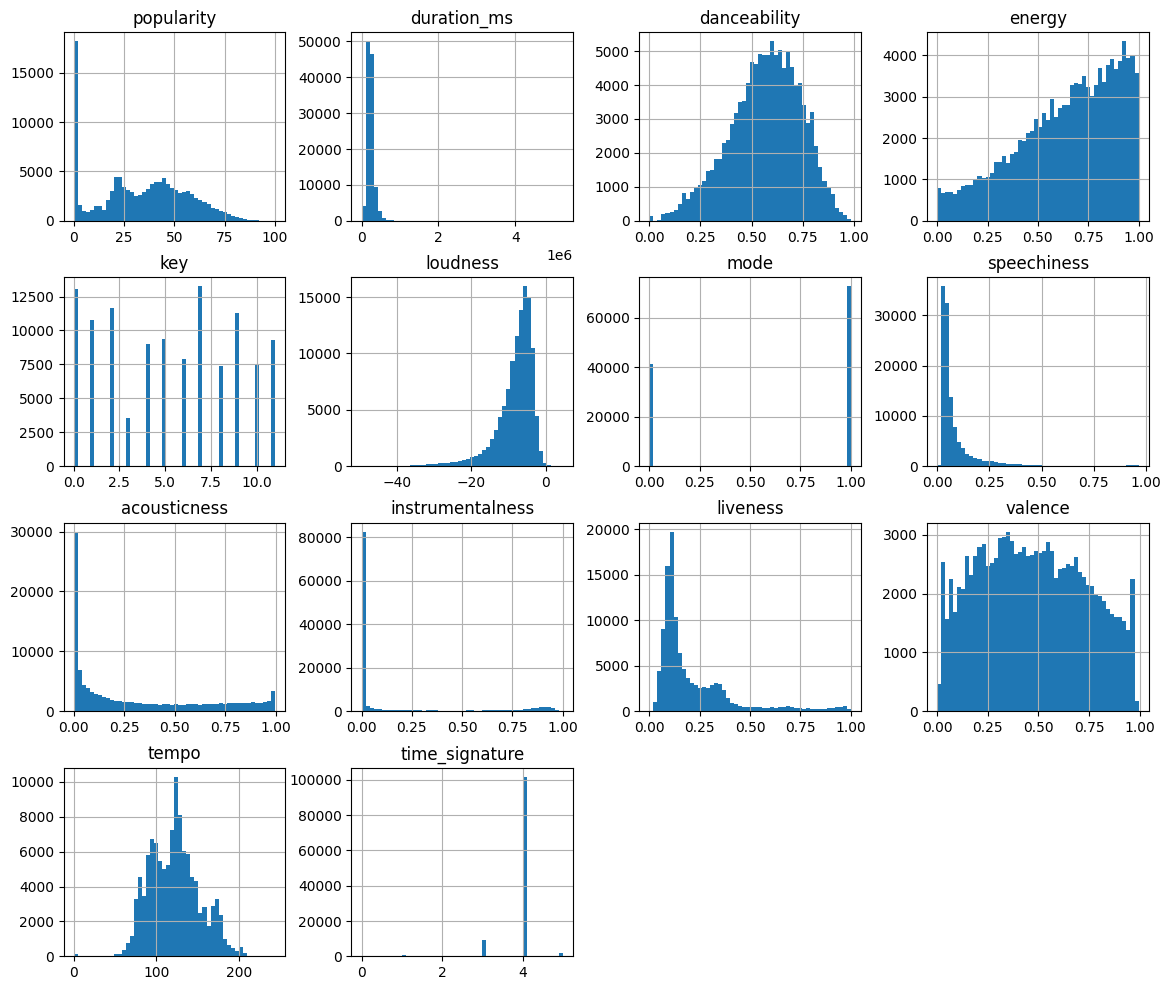

In [8]:
import matplotlib.pyplot as plt 
df.hist(bins=50, figsize=(14, 12))
plt.show()

In [9]:
# Change random values for random rows to null
import numpy as np
df.iloc[np.random.randint(0, len(df), 10), 11] = np.nan # Introduce nans to loudness column
df.iloc[np.random.randint(0, len(df), 10), 9] = np.nan # Introduce nans to energy column
df.iloc[np.random.randint(0, len(df), 10), 8] = np.nan # Introduce nans to danceability column
print(df.isnull().sum())


track_id             0
artists              1
album_name           1
track_name           1
popularity           0
duration_ms          0
explicit             0
danceability         0
energy              10
key                 10
loudness             0
mode                10
speechiness          0
acousticness         0
instrumentalness     0
liveness             0
valence              0
tempo                0
time_signature       0
track_genre          0
dtype: int64


# Feature Engineering

In [10]:
# Transform 'explicit' to 0 or 1
df['explicit'] = df['explicit'].astype(int)
df['explicit'][0]
# It worked!

0

In [11]:
# Encode the genre column to numerical values
# I will use One Hot Encoding, it's the most common and easy to understand - it causes the number of columns to explode though so I might change it in the future
# df = pd.get_dummies(df, columns=['track_genre'])
# We now have...
# print(df.shape)
# 133 columns, from 20

# UPDATE:
# I'm going to try Label Encoding instead

In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['track_genre_labeled'] = le.fit_transform(df['track_genre'])
df
# It's now one column, doesn't take up as much space - but the values might be misleading, 
# as they are now numerical values, genres might be interepreted in a different way

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,track_genre_labeled
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,0,0.676,0.4610,1.0,...,0.0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic,0
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,0,0.420,0.1660,1.0,...,1.0,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic,0
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,0,0.438,0.3590,0.0,...,1.0,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic,0
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,0,0.266,0.0596,0.0,...,1.0,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic,0
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,0,0.618,0.4430,2.0,...,1.0,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,0,0.172,0.2350,5.0,...,1.0,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music,113
113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,0,0.174,0.1170,0.0,...,0.0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music,113
113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,0,0.629,0.3290,0.0,...,0.0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music,113
113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,0,0.587,0.5060,7.0,...,1.0,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music,113
